# **Tarea 6**

## **Parte 1: Posible algoritmo supervisado aplicable a los datos**

## Regresión losgística

La regresión logística es utilizada para predecir el resultado de una variable categórica en función de las variables predictoras. La regresión logística también se conoce como regresión logit, clasificación de máxima entropía (MaxEnt) o clasificador log-lineal y se enmarca dentro de los modelos denominados de predicción lineal generalizdos (glm). En este modelo, las probabilidades que describen los posibles resultados de un único ensayo se modelan mediante una función logística.

Esta implementación puede adaptarse a regresión logística binaria, uno contra resto o multinomial con opción $l_1$ y $l_2$.

Para este caso, se requiere de la regresión logística binaria, ya que estamos manejando un conjunto de datos correspondientes a transacciones que cuentan con la clasificación de tratarse de operacioneos legítimas o no (variable binaria o dicotómicas que toma valores 1 o 0).

La binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de n ensayos. Si el evento de éxito tiene una probabilidad de ocurrencia $p$, la probabilidad del evento contrario -el de fracaso- tendrá una probabilidad de $q= 1-p$. En la distribución binomial se repite el experimento $n$ veces, de forma independiente, y se trata de calcular la probabilidad de un determinado número de éxitos $d$, en esas $n$ repeticiones  $B(n,p)$.

La denominación de logística se debe a la forma de la propia función de distribución de probabilidad binomial que presenta un crecimiento exponencial y que se parece a una $S$ y que toma el nombre matemático de función logística  

$\frac{1}{1+e^{-t}}$. 

Esta curva, es una aproximación continua a la función discreta binaria, pues el cambio de 0 a 1 se produce en corto espacio y muy pronunciado. Dado que la predicción se da en modo de probabilidad, se debe establecer qué umbral es el que fija el pronostico 0 o 1 (ej. 0.5). 

## Métricas de desempeño
Matriz de Confusión: Aunque no es una métrica de error per se, proporciona una representación visual de los verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP), y falsos negativos (FN), los cuales a su vez son la base para muchas de las siguientes métricas.

Exactitud (Accuracy): Es la proporción de predicciones correctas sobre el total de casos. Aunque es la métrica más intuitiva, puede ser engañosa en conjuntos de datos desbalanceados donde una clase es mucho más frecuente que la otra.

$\frac{TP+TN}{TP+TN+FP+FN}$

Error de Clasificación (Classification Error): También conocido como tasa de error, es la proporción de predicciones incorrectas respecto al total de predicciones. Se calcula como 
$1 − Exactitud$

Precisión (Precision): Proporción de verdaderos positivas entre el total de positivos. Es una métrica importante cuando el costo de un falso positivo es alto.

$\frac{TP}{TP+FP}$


Sensibilidad (Recall) y Especificidad (Specificity): De todos los casos positivos reales, cuántos fueron identificados correctamente por el modelo, mientras que la especificidad mide la proporción de negativos reales que se identificaron correctamente.

Recall = $\frac{TP}{TP+FN}$

Specificity = $\frac{TN}{TN+FP}$

Valor-F (F-score): Es el promedio armónico de precisión y sensibilidad. Es útil cuando se busca un balance entre precisión y sensibilidad, especialmente si la distribución de las clases es desigual.

F1 = $\frac{2*(precision*recall)}{(precision + recall)}$

Área Bajo la Curva ROC (AUC - ROC): Mide la capacidad de un clasificador para distinguir entre clases y es usado como resumen de la curva ROC.

## **Parte 2: Algoritmo supervisado y métricas de error**

Se importan las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
# Carga de datos
trans=pd.read_csv('C:/Users/sandy/Downloads/trans_vf_2.csv')
# cambiamos el tipo de dato a datetime
trans['Timestamp'] = pd.to_datetime(trans['Timestamp'])

#trans.timestamp = trans.timestamp.values.astype(np.int64) / 10 ** 9
trans['Timestamp']=trans['Timestamp'].astype('int64')/10**9

In [3]:
features = trans.drop(['R_CCY', 'Amount Received', 'Amount Paid'], axis=1)

In [4]:
# separamos el conjunto de datos en variables predicotras y respuesta
X=features.drop(features.columns[7], axis=1)
y=features['Is Laundering']

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# escalamos los datos para mejorar la convergencia del modelo de regresión logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  modelo de regresión logística 
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# predicciones
y_pred = logistic_model.predict(X_test)

<Figure size 640x480 with 0 Axes>

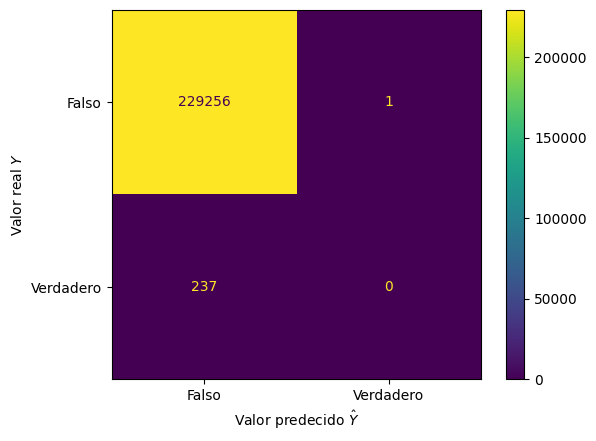

In [6]:
# Evaluamos el modelo
cm=metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Falso', 'Verdadero'])

plt.figure()
cm_display.plot()
plt.ylabel('Valor real $Y$')
plt.xlabel('Valor predecido $\hat{Y}$')
plt.show()

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Instanciar el clasificador XGBoost
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', max_depth = 3, n_estimators=100, learning_rate=0.1, seed=42)

# Entrenar el clasificador
xg_clf.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = xg_clf.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.90%


<Figure size 640x480 with 0 Axes>

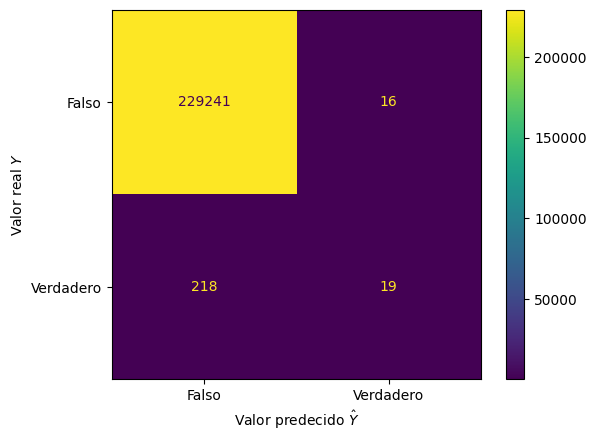

In [13]:
# Evaluamos el modelo
cm=metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Falso', 'Verdadero'])

plt.figure()
cm_display.plot()
plt.ylabel('Valor real $Y$')
plt.xlabel('Valor predecido $\hat{Y}$')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

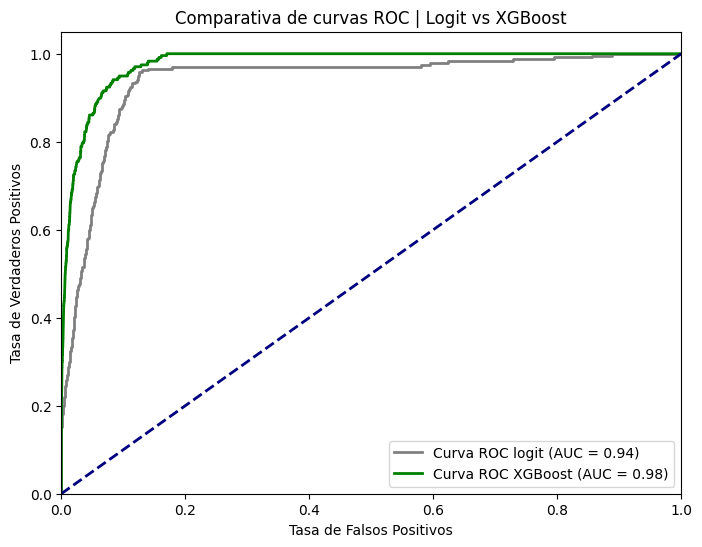

In [18]:
#  curva ROC logit
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# curva ROC XGBoost
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xg_clf.predict_proba(X_test)[:,1])
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)

# gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='grey', lw=2, label=f'Curva ROC logit (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_xgboost, tpr_xgboost, color='green', lw=2, label=f'Curva ROC XGBoost (AUC = {roc_auc_xgboost:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparativa de curvas ROC | Logit vs XGBoost')
plt.legend(loc='lower right')

plt.show()


El modelo de regresión logística mostró un desempeño muy pobre comparado con xgboost, el cuál aún puede mejorar al pasarlo por un proceso de búsqueda de los mejores hiperparámetros.

- https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
- https://fervilber.github.io/Aprendizaje-supervisado-en-R/glm.html
- https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

